# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages
- Load the data
- Qualitative predictor variables are of the *category* data type and appropriate mappings are done to convert them to qualitative predictor columns to object datatype

### Importing the necessary libraries

In [1]:
#for not displaying warnings importing warnings library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#for linear regression modelling and analysis
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot

In [4]:
#reading the file
bike_sharing=pd.read_csv('day.csv')

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Dropping columns registered, casual, instant and dteday as they are not important for the analyses.

In [6]:
bike_sharing.drop(columns=['registered','casual','instant','dteday'],inplace=True)

Dropping column workingday as it is a redundant column because if it is not a Sunday, Saturday or a holiday a day automatically becomes a workingday and hence the column is not required because it will be taken care of later after the creation of dummy variables.

In [7]:
bike_sharing.drop(columns=['workingday'],inplace=True)

In [8]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


Certain columns are categorical in nature but the data is presented in terms of numbers and are wrongly appearing as continuos variables. Hence converting them to categorical variables using necessary mappings as poer the data dictionary.

In [9]:
bike_sharing['weekday']=bike_sharing['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike_sharing['season']=bike_sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing['mnth']=bike_sharing['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_sharing['weathersit']=bike_sharing['weathersit'].map({1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'})

<Axes: >

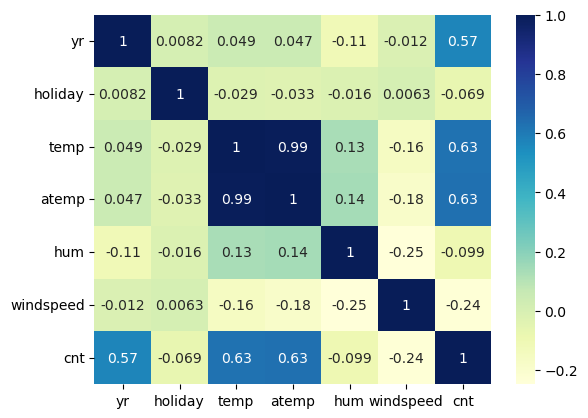

In [10]:
sns.heatmap(data=bike_sharing.corr(),annot=True,cmap='YlGnBu')

Now columns atemp and temp are very highly correlated and have a correlation of 0.99. atemp is dropped as it is the feeling temperature and not the physically measured temperature. The physically measured temperature is available in the temp column and hence dropping atemp column.

In [11]:
bike_sharing.drop(columns='atemp',axis=1,inplace=True)

In [12]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,clear,9.305237,43.6957,12.522300,1600


Creating dummy variables for the below columns:

1. weekday
2. mnths
3. season
4. weathersit

In [13]:
weekday=pd.get_dummies(bike_sharing['weekday'])
weekday.drop('Monday',axis=1,inplace=True)
weekday.head()

,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [14]:
months=pd.get_dummies(bike_sharing['mnth'],drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [15]:
seasons=pd.get_dummies(bike_sharing['season'],drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
weathersit=pd.get_dummies(bike_sharing['weathersit'],drop_first=True)
weathersit.head()

,light snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


# Part 2 - Exploratory Data Analysis

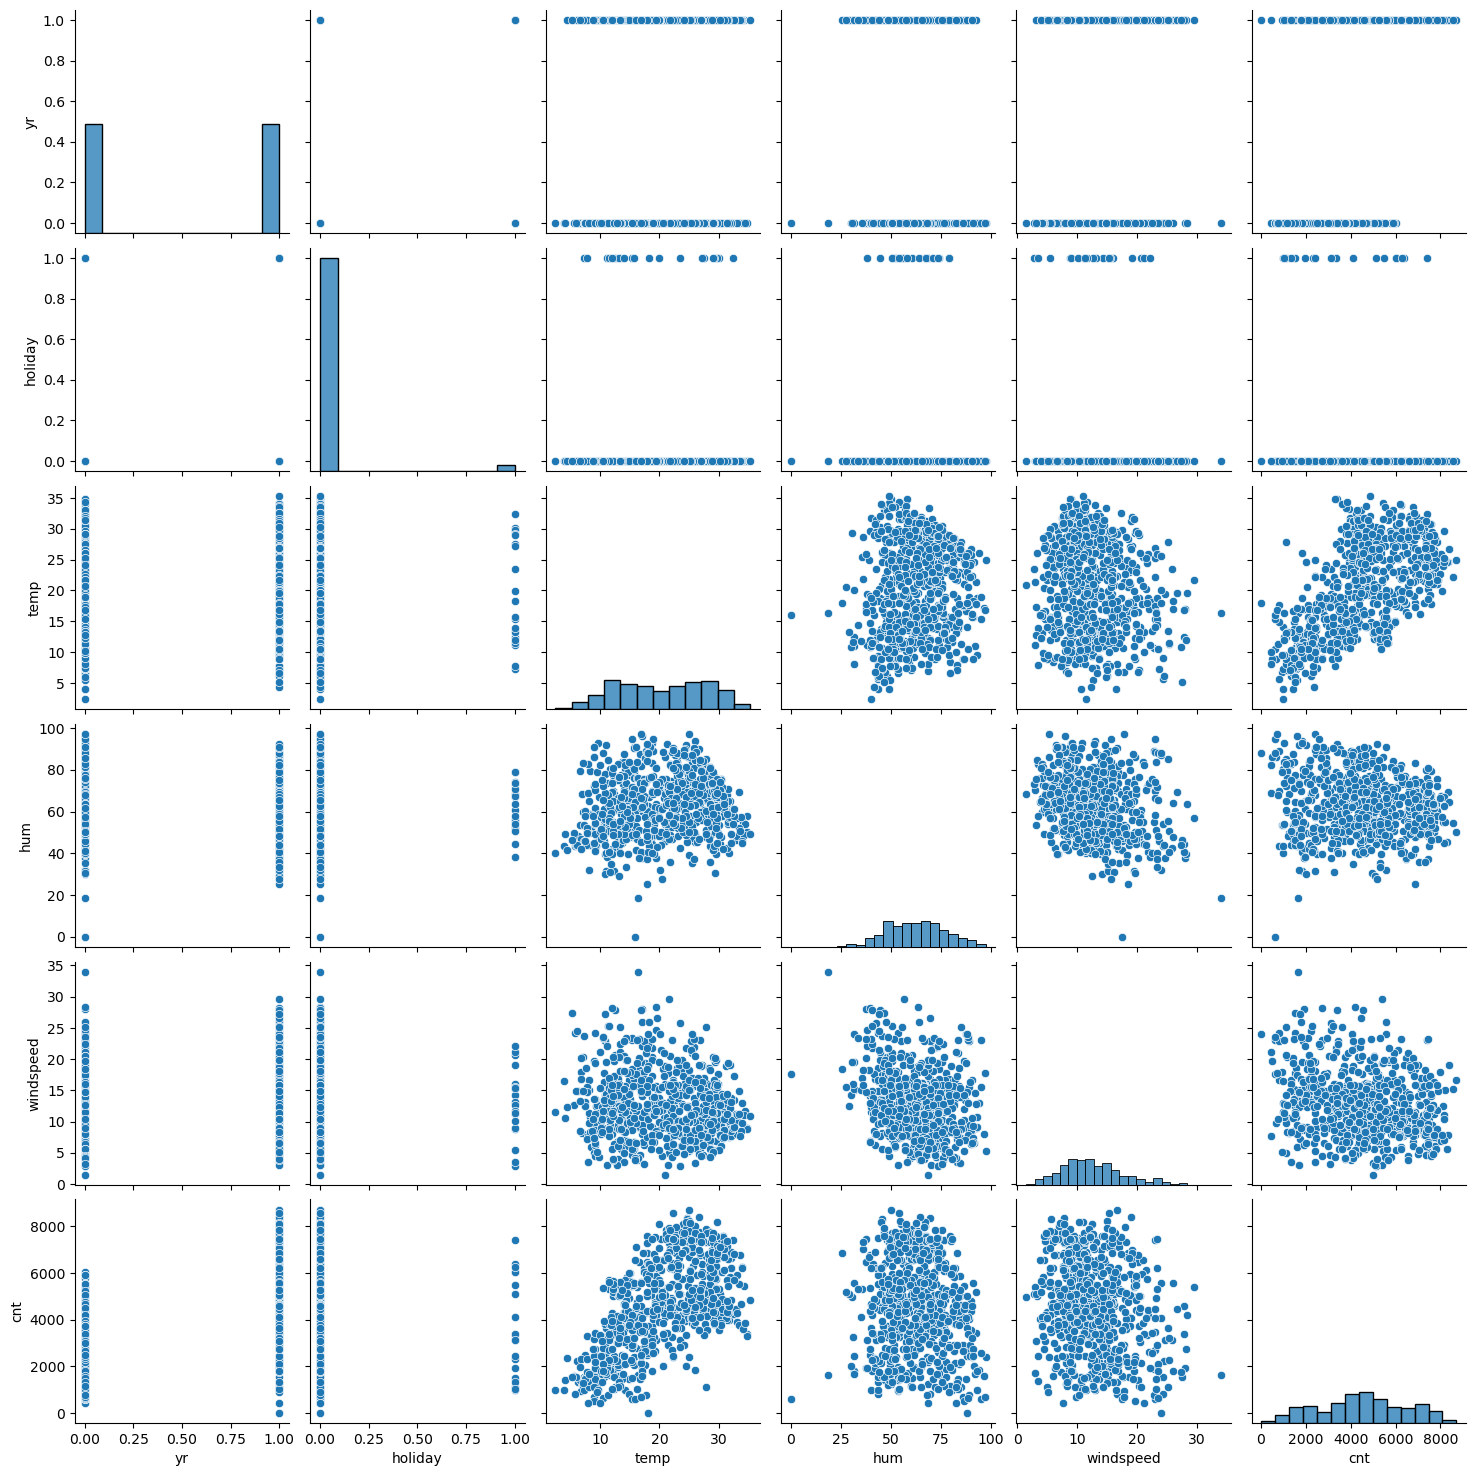

In [17]:
sns.pairplot(bike_sharing)

<Axes: xlabel='season', ylabel='count'>

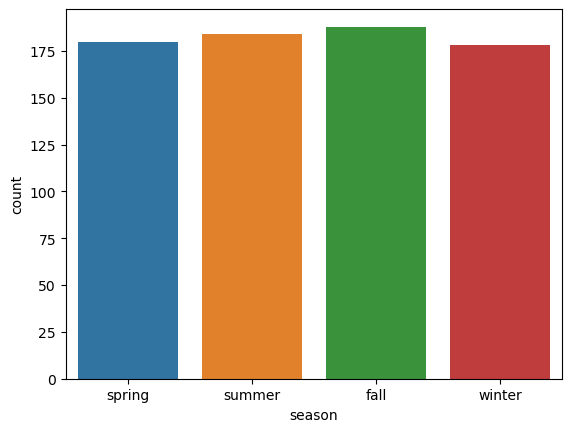

In [18]:
sns.countplot(data = bike_sharing,x='season')

From the countplot it is clear that the there is an even distribution of the data points for different seasons.

<Axes: xlabel='weathersit', ylabel='count'>

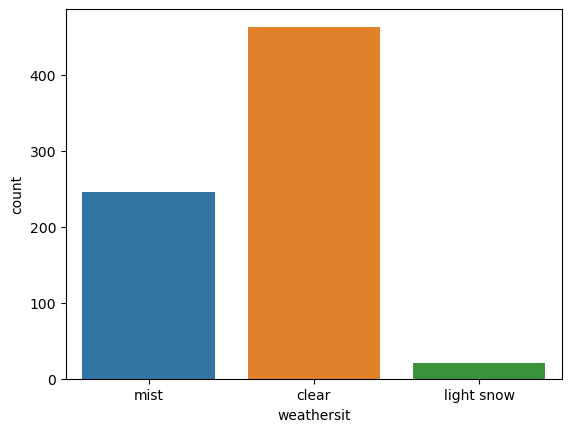

In [19]:
sns.countplot(data = bike_sharing,x='weathersit')

From the countplot it can be observed that there are more data points for clear weather situation than any other weather situation.

<Axes: xlabel='weekday', ylabel='count'>

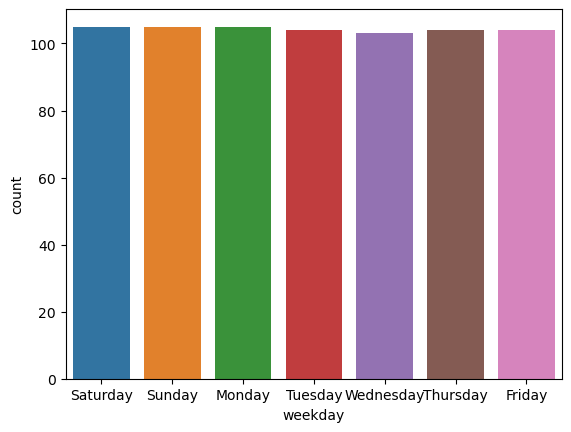

In [20]:
sns.countplot(data = bike_sharing,x='weekday')

From the countplot it can be observed that there is an even distribution  of the data points for the days in a week.

<Axes: xlabel='mnth', ylabel='count'>

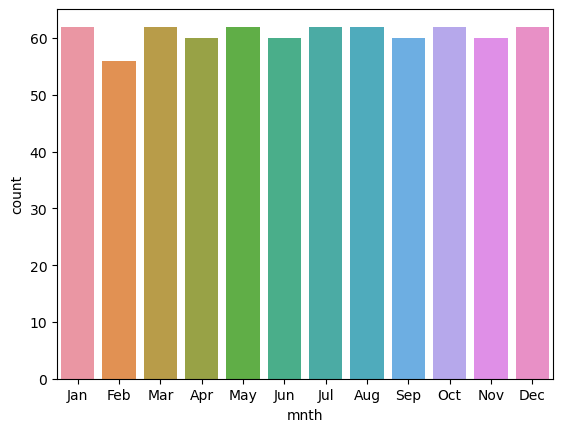

In [21]:
sns.countplot(data = bike_sharing,x='mnth')

From the countplot it can be observed that there is an even distribution of the data points for the months in a year.

<Axes: xlabel='season', ylabel='cnt'>

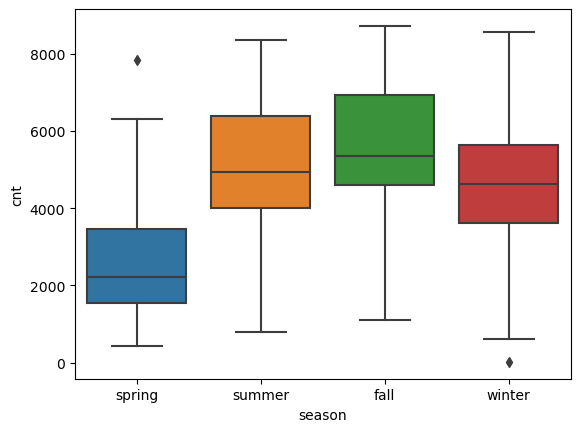

In [22]:
sns.boxplot(x='season',y='cnt',data=bike_sharing)

From the boxplot it can be observed that the count of bike rentals is higher for summer and fall season in comparison to winter and spring seasons.

<Axes: xlabel='mnth', ylabel='cnt'>

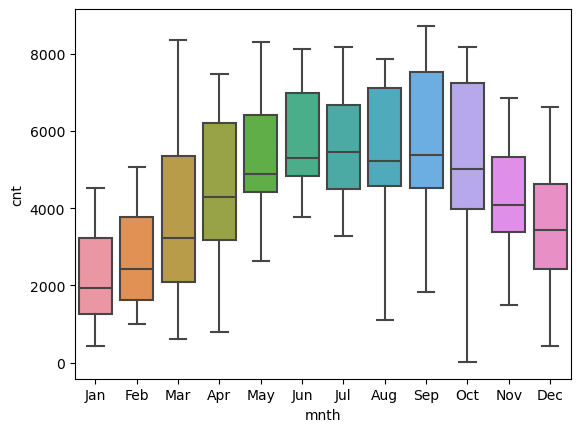

In [23]:
sns.boxplot(x='mnth',y='cnt',data=bike_sharing)

From the boxplot it can be observed that the highest median count of bike rentals is in the month of July and the lowest median count is in January.

<Axes: xlabel='weathersit', ylabel='cnt'>

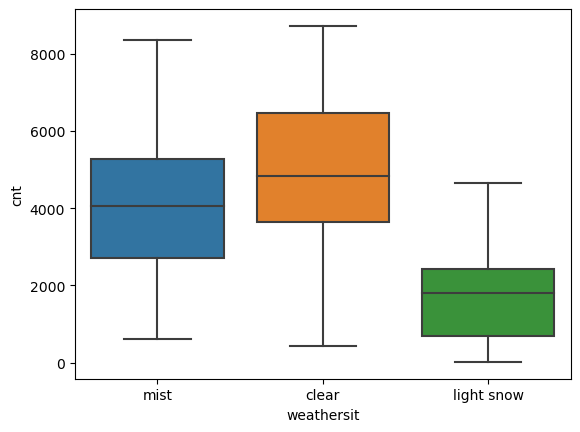

In [24]:
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing)

From the boxplot it can be observed that when there is a Light Snow, Light Rain and Thunderstorm and Scattered clouds orLight Rain and Scattered clouds is  the median count of bike rentals is the lowest.

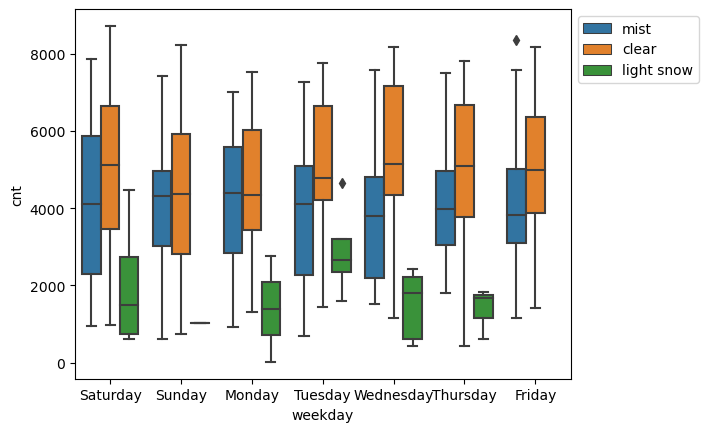

In [25]:
sns.boxplot(x='weekday',y='cnt',hue='weathersit',data=bike_sharing)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

From the boxplot it can be observed that bike rental median count is higher on light snow days if it is not a weekend.

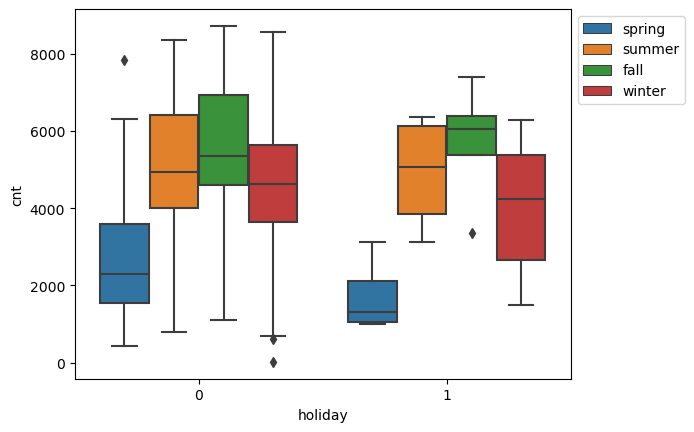

In [26]:
sns.boxplot(x='holiday',y='cnt',hue='season',data=bike_sharing)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

From the boxplot it can be observed that in winter and spring season holidays have a lesser median count of bike rental while in summer and fall seasons the median count of bike rentals is higher on holidays.

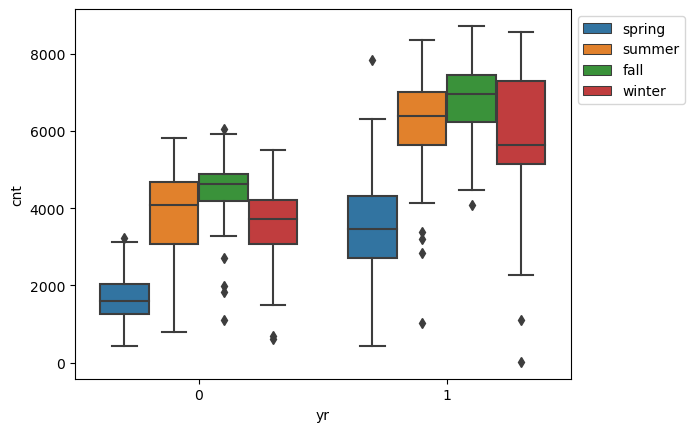

In [27]:
sns.boxplot(x='yr',y='cnt',hue='season',data=bike_sharing)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

From the boxplot it can be observed that irrespective of the season the bike rental median count has increased from 2018 to 2019.

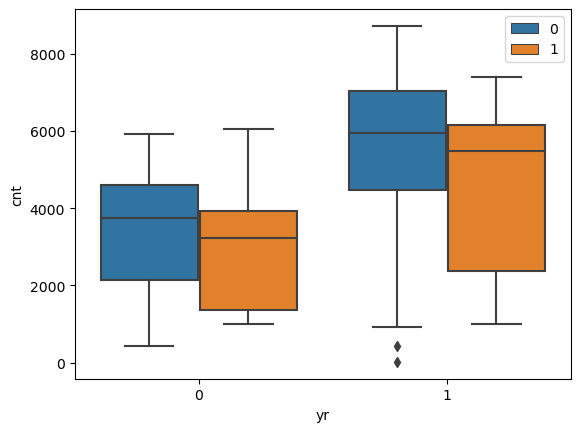

In [28]:
sns.boxplot(x='yr',y='cnt',hue='holiday',data=bike_sharing)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

From the boxplot it can be observed that irrespective of whether it is a holiday or not the bike rental median count has increased from 2018 to 2019.

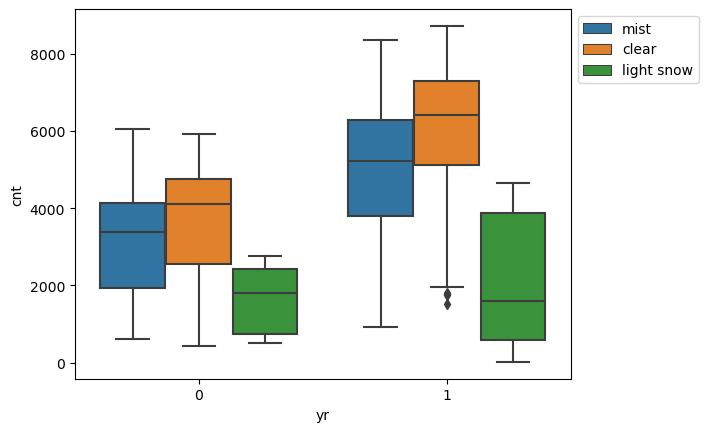

In [29]:
sns.boxplot(x='yr',y='cnt',hue='weathersit',data=bike_sharing)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

From the boxplot it can be observed that apart from light snow weather condition the bike rental median count has increased from 2018 to 2019 for all other weather situations.

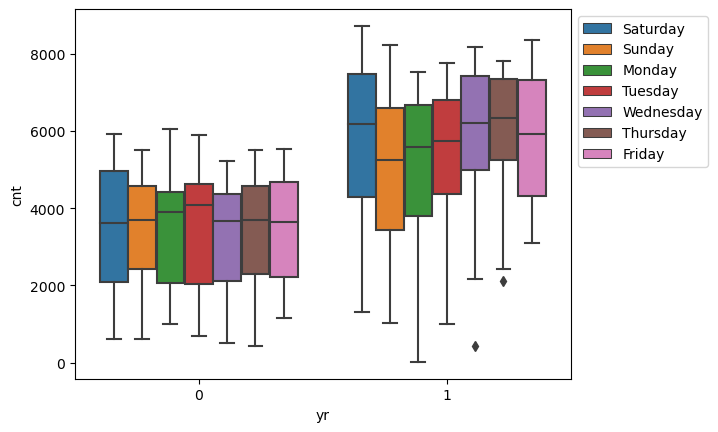

In [30]:
sns.boxplot(x='yr',y='cnt',hue='weekday',data=bike_sharing)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

From the boxplot it can be observed that irrespective of the weekday the bike rental median count has increased from 2018 to 2019.

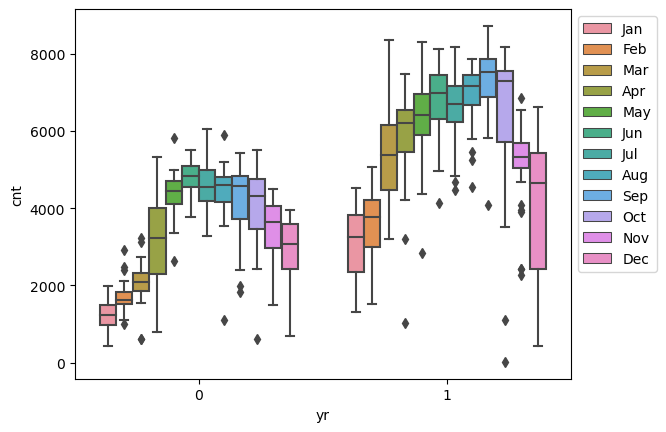

In [31]:
sns.boxplot(x='yr',y='cnt',hue='mnth',data=bike_sharing)
plt.legend(loc = 'best', bbox_to_anchor = (1,1))

From the boxplot it can be observed that irrespective of the month the bike rental median count has increased from 2018 to 2019.

## Part 3 - Modelling Activity

Combining dummy variables to the data set for analysis.

In [32]:
bike=pd.concat([bike_sharing,seasons,weathersit,months,weekday],axis=1)

In [33]:
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Saturday,mist,14.110847,80.5833,10.749882,985,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sunday,mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Monday,clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wednesday,clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,1


Dropping columns season, mnth, weekday and weathersit as they are already explained using dummy variables.

In [34]:
bike.drop(columns=['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [35]:
bike.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'light snow', 'mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Friday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Model-1 using sklearn

In [36]:
#creating a scaler object
scaler = MinMaxScaler()

In [37]:
#splitting the dataset into train and test
df_train,df_test=train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

In [38]:
#defining a list for numerical variables for scaling of these variables
num_vars=['temp','hum','windspeed','cnt']

In [39]:
#scaling of the train dataset
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [40]:
y_train=df_train.pop('cnt')
X_train=df_train

In [41]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [42]:
X_train.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,light snow,mist,...,May,Nov,Oct,Sep,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [43]:
#instantiating a LinearRegression object
lm_sk = LinearRegression()

In [44]:
#fitting the train dataset
lm_sk.fit(X_train,y_train)

LinearRegression()

In [45]:
lm_sk.coef_

array([ 0.23211572, -0.08692514,  0.45056169, -0.15134004, -0.18645332,
       -0.04815901,  0.03872462,  0.10584692, -0.25744279, -0.0610664 ,
        0.01440398, -0.0455859 , -0.03228181, -0.06277659, -0.04035007,
       -0.00297239,  0.00104515,  0.02393995, -0.04185131,  0.00753359,
        0.0810599 ,  0.02090673,  0.02041141, -0.03412418,  0.01166999,
        0.00201688,  0.01551922])

In [46]:
lm_sk.intercept_

0.3210617414481283

In [47]:
y_train_pred=lm_sk.predict(X_train)
res=y_train-y_train_pred

#checking the r2_score
print(r2_score(y_train,y_train_pred))

0.8533032523096307


#### Plotting residuals against fitted values.

Text(0, 0.5, 'Residuals')

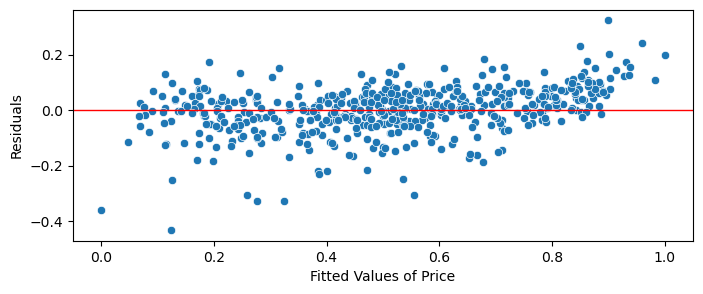

In [48]:
# Creating a scatter plot between the fitted values of 'cnt' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = y_train, y = res)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals')

It can be seen from the above plot that apart from few points the value of residuals is in the range of -0.3 to 0.2 and the residuals are not increasing with the value of fitted values and hence they can be said to follow homoscedasticity.

#### Plotting the distribution of residuals.

Text(0.5, 0, 'Residual Values')

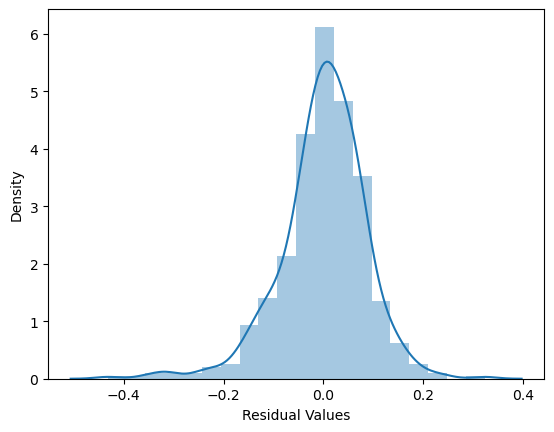

In [49]:
sns.distplot(res,bins=20)
plt.xlabel('Residual Values')

It can be seen that the left tail is slightly thicker than a normal distribution but overall the residuals are normal in nature with their mean centred at 0.

In [50]:
df_test[num_vars]=scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
y_test_pred = lm_sk.predict(X_test)

In [52]:
print(r2_score(y_test,y_test_pred))

0.8275257527788901


#### The R2 score for the test data as per model 1 is 0.828 in comparison to the R2 score of 0.853 for the train data set.

Text(0, 0.5, 'y_pred')

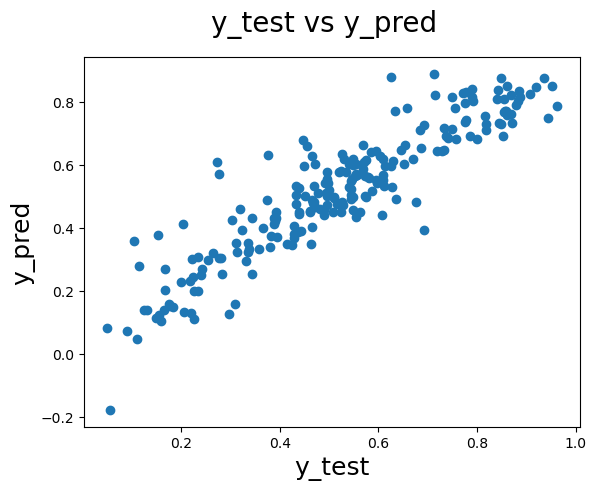

In [53]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)      

#### It can be seen from the above figure that the model is good and it is able to predict the values of bike demand with a good amount of accuracy with the model.

## Model-2 using statsmodels.api

In [54]:
#splitting the dataset into train and test
df_train,df_test=train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

#defining a list for numerical variables for scaling of these variables
num_vars=['temp','hum','windspeed','cnt']

#creating a scaler object
scaler = MinMaxScaler()

#scaling of the train dataset
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [55]:
y_train=df_train.pop('cnt')
X_train=df_train

In [56]:
X_train_sm=sm.add_constant(X_train)
lm_ols=sm.OLS(y_train,X_train_sm).fit()

In [57]:
print(lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.74e-182
Time:                        23:04:37   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3211      0.044      7.260      0.0

The above summary is when we are using all the predictor variables to predict the independent variable but by a quick glance on the summary we can note that there are many variables which have higher p values and are not significant for predicting the independent variable, we will remove them and make the analysis using variables having p-values lower than 0.05.

In [58]:
#defining a fundtion to remove all the variables having p-value greater than alpha given the training set
def feat_rem(alpha,X_train):
    col=[]
    X_train_sm=sm.add_constant(X_train)
    lm_ols=sm.OLS(y_train,X_train_sm).fit()
    #print('Summary for initial model having all the predictor variables\n')
    #print(lm_ols.summary())    
    pvalues=lm_ols.pvalues
    while (pvalues.max()>=alpha):
        col.extend(list(pvalues[pvalues==max(lm_ols.pvalues)].index))
        X_train.drop(pvalues[pvalues==max(lm_ols.pvalues)].index,axis=1,inplace=True)
        X_train_sm=sm.add_constant(X_train)
        lm_ols=sm.OLS(y_train,X_train_sm).fit()
        pvalues=lm_ols.pvalues
    #print('\n',lm_ols.summary())
    return(lm_ols,X_train,col)

In [59]:
lm_ols,X_train,col=feat_rem(0.05,X_train)

In [60]:
#Checking the summary
print(lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.11e-191
Time:                        23:04:39   Log-Likelihood:                 523.38
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     493   BIC:                            -940.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3231      0.035      9.107      0.0

Now VIF needs to be checked for multicollinearity.

In [61]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.22
2,temp,17.81
4,windspeed,4.72
5,spring,4.37
7,winter,4.07
6,summer,2.81
9,mist,2.34
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


hum and temp have very high VIF values hence we will drop hum first and check VIF.

In [62]:
X_train.drop('hum',axis=1,inplace=True)

In [63]:
X_train_sm=sm.add_constant(X_train)
lm_ols=sm.OLS(y_train,X_train_sm).fit()
print(lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.98e-189
Time:                        23:04:40   Log-Likelihood:                 515.27
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     494   BIC:                            -930.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2552      0.032      8.075      0.0

In [64]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.21
3,windspeed,4.67
6,winter,2.97
4,spring,2.92
5,summer,2.24
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.60
8,mist,1.56


temp has VIF value higher than 5 but temp has a business importance and hence dropping summer as it has the highest p-value and also the lowest value of coefficient. 

In [65]:
X_train.drop('summer',axis=1,inplace=True)

In [66]:
X_train_sm=sm.add_constant(X_train)
lm_ols=sm.OLS(y_train,X_train_sm).fit()
print(lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.64e-189
Time:                        23:04:42   Log-Likelihood:                 512.71
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2987      0.025     11.962      0.0

In [67]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.73
3,windspeed,4.05
5,winter,2.56
4,spring,2.38
0,yr,2.06
11,Nov,1.80
9,Jan,1.65
7,mist,1.53
8,Dec,1.46
10,Jul,1.36


Now all the predictor variables have VIF lower than 5 and thus we can finalise this model.

In [68]:
res

653    0.109091
576    0.104699
426   -0.054983
728   -0.132630
482   -0.135052
         ...   
526    0.022783
578    0.002068
53    -0.042674
350    0.028059
79    -0.058003
Name: cnt, Length: 510, dtype: float64

In [69]:
y_train_pred = lm_ols.predict(X_train_sm)
res = y_train - y_train_pred

Text(0.5, 0, 'Residual Values')

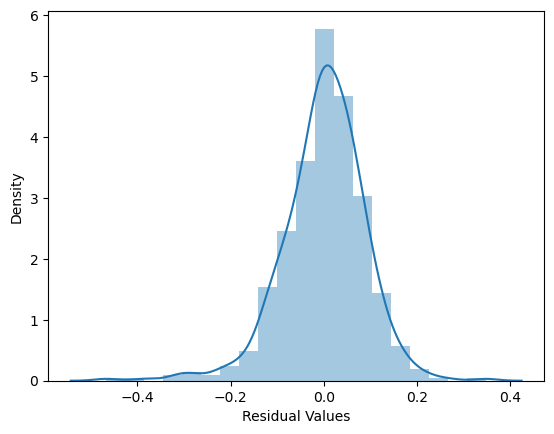

In [70]:
sns.distplot(res,bins=20)
plt.xlabel('Residual Values')

#### Observation-1: It can be seen that the left tail is slightly thicker than the right tail but overall the distribution of residual is  normal in nature with their mean centred at 0.

Text(0, 0.5, 'Standardized Residuals')

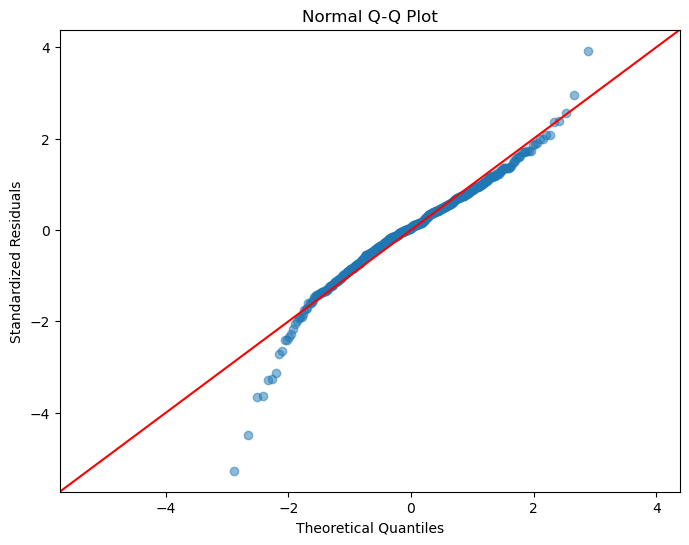

In [71]:
QQ = ProbPlot(lm_ols.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1)
fig.set_size_inches(8, 6)
fig.gca().set_title('Normal Q-Q Plot')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals')

#### Observation-2: It can be seen from the Q-Q plot that the sample standardised residuals are following the theoretical line except for the tail points, indicating that the distribution is normal.

Text(0, 0.5, 'Residuals')

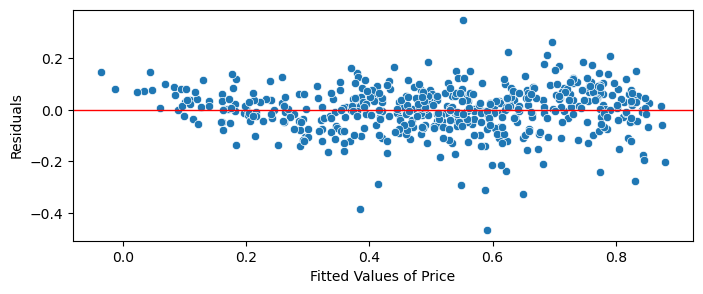

In [72]:
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lm_ols.fittedvalues, y = lm_ols.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals')

#### Observation-3: It can be seen from the above plot that apart from few points the value of residuals is in the range of -0.3 to 0.2 and the residuals are not increasing with the value of fitted values and hence they can be said to follow homoscedasticity.

In [73]:
col = col + ['hum','summer']

In [74]:
col

['Mar',
 'Tuesday',
 'Jun',
 'Oct',
 'Aug',
 'Thursday',
 'Wednesday',
 'Friday',
 'Saturday',
 'May',
 'Feb',
 'hum',
 'summer']

In [75]:
df_test.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'light snow', 'mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Friday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [76]:
df_test[num_vars]=scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test
X_test.drop(columns=col,axis=1,inplace=True)

In [77]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [78]:
X_test.head()

,yr,holiday,temp,windspeed,spring,winter,light snow,mist,Dec,Jan,Jul,Nov,Sep,Sunday
184,0,1,0.831783,0.084219,0,0,0,1,0,0,1,0,0,0
535,1,0,0.901354,0.153728,0,0,0,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,1,0,0,0,0,0,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0,0


In [79]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm_ols.predict(X_test_sm)

In [80]:
res_test = y_test - y_test_pred

Text(0, 0.5, 'Residuals')

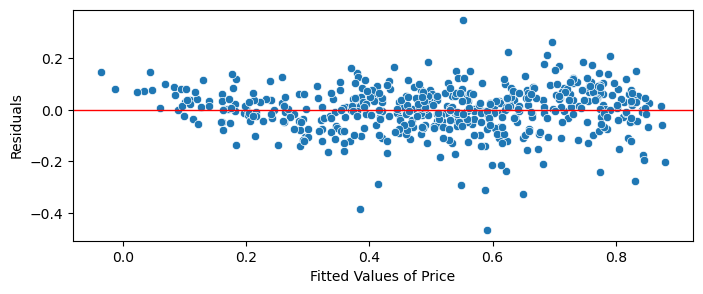

In [81]:
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lm_ols.fittedvalues, y = lm_ols.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals')

Text(0, 0.5, 'y_pred')

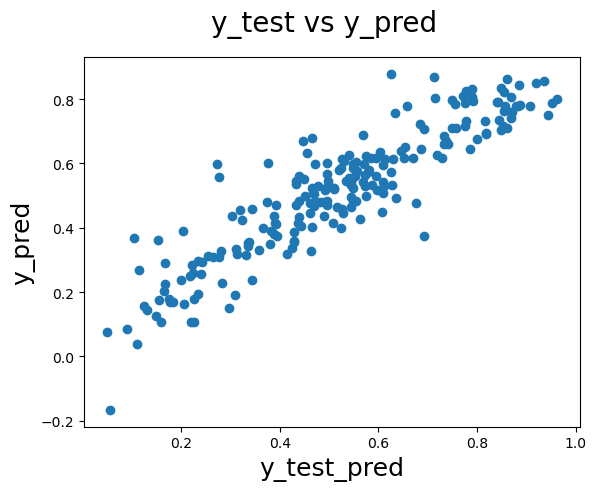

In [82]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_pred', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)      

#### It can be seen from the above figure that the model is good and it is able to predict the values of bike demand with a good amount of accuracy with the model.

In [83]:
print(r2_score(y_test,y_test_pred))

0.818462079590367


#### The R2 score for the test data as per model 2 is 0.818 in comparison to the R2 score of 0.844 for the train data set.

#### The equation of our best fitted line as per model 2 is:

$ cnt = 0.2347 \times  yr - 0.0990  \times  holiday + 0.3995 \times temp - 0.1543  \times windspeed - 0.1026 \times spring + 0.0679 \times winter  - 0.3006 \times light snow - 0.0832 \times mist - 0.0535 \times Dec - 0.0572 \times Jan - 0.0616 \times Jul  + 0.0522 \times Sep - 0.0495 \times Sunday + 0.2987 $

## Model-3 using statsmodels.api and rfe 

In [84]:
#splitting the dataset into train and test
df_train,df_test=train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

#defining a list for numerical variables for scaling of these variables
num_vars=['temp','hum','windspeed','cnt']

#creating a scaler object
scaler = MinMaxScaler()

#scaling of the train dataset
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [85]:
y_train=df_train.pop('cnt')
X_train=df_train

In [86]:
#definign a dictionary to store the values of r2 score of models obtained using RFE as values and the number 
#of features as keys 
featurenum_vs_radj={}
for i in range(len(X_train.columns)):
    rfe=RFE(estimator=LinearRegression(),n_features_to_select=i+1)
    rfe = rfe.fit(X_train, y_train)
    featurenum_vs_radj.update({i+1:1-((1-rfe.score(X_train,y_train))*(729)/(729-(i+1)))})

In [87]:
feat_vs_radj=pd.DataFrame({'num_of_feat':i[0],'r2_adj':i[1]} for i in zip(featurenum_vs_radj.keys(),featurenum_vs_radj.values()))

In [88]:
feat_vs_radj

,num_of_feat,r2_adj
0,1,0.413309
1,2,0.438810
2,3,0.470863
3,4,0.732092
4,5,0.747634
5,6,0.802488
6,7,0.811403
7,8,0.814109
8,9,0.822629
9,10,0.827183


In [89]:
feat_vs_radj['num_of_feat'][feat_vs_radj['r2_adj']==feat_vs_radj['r2_adj'].max()]

21    22
Name: num_of_feat, dtype: int64

#### Selecting number of features as 13 for rfe as the increase in r2_adj is very less per increase of features after this point

In [90]:
rfe=RFE(estimator=LinearRegression(),n_features_to_select=13)

In [91]:
rfe=rfe.fit(X_train, y_train)

In [92]:
col = X_train.columns[rfe.support_]

In [93]:
X_train_rfe = X_train[col]

In [94]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [95]:
lm_rfe_ols=sm.OLS(y_train,X_train_rfe_sm).fit()

In [96]:
print(lm_rfe_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.13e-192
Time:                        23:05:00   Log-Likelihood:                 517.45
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2852      0.034      8.395      0.0

The model has no features whose p-values are higher than 0.05 as can be seen by glancing at the summary. Thus we will proceed to check VIF for multicollinearity.

In [97]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
9,mist,2.30
0,yr,2.08
10,Jul,1.59
11,Sep,1.39


As VIF for hum feature is very high dropping the same.

In [98]:
X_train_rfe.drop(columns='hum',axis=1,inplace=True)

In [99]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm_rfe_ols=sm.OLS(y_train,X_train_rfe_sm).fit()
print(lm_rfe_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.45e-190
Time:                        23:05:02   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2063      0.029      7.088      0.0

In [100]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.22
4,spring,2.11
0,yr,2.07
6,winter,1.82
9,Jul,1.59
8,mist,1.55
10,Sep,1.34
11,Sunday,1.18


From the summary it is clear that none of the predictor variables have a p-value greater than 0.05 but VIF table indicates that temp has a higher VIF above 5. We can check the rfe.support_ after running RFE for 11 predictor variables and drop the predictor variable accordingly.

In [101]:
rfe=RFE(estimator=LinearRegression(),n_features_to_select=11)
rfe=rfe.fit(X_train_rfe, y_train)
imp_var = list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))
imp_var

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1),
 ('Jul', True, 1),
 ('Sep', True, 1),
 ('Sunday', True, 1)]

In [102]:
X_train_rfe.drop(columns='summer',axis=1,inplace=True)

In [103]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm_rfe_ols=sm.OLS(y_train,X_train_rfe_sm).fit()
print(lm_rfe_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.60e-189
Time:                        23:05:03   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     498   BIC:                            -931.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2597      0.024     10.993      0.0

In [104]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,yr,2.06
4,spring,1.66
7,mist,1.52
5,winter,1.41
8,Jul,1.35
9,Sep,1.20
10,Sunday,1.18
6,light snow,1.08


In [105]:
y_train_pred=lm_rfe_ols.predict(X_train_rfe_sm)

In [106]:
res_rfe=y_train-y_train_pred

Text(0, 0.5, 'Residuals')

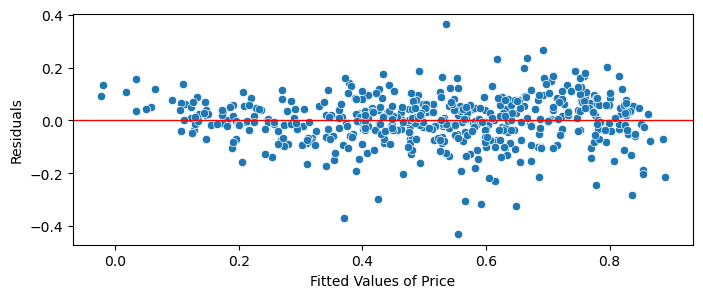

In [107]:
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lm_rfe_ols.fittedvalues, y = lm_rfe_ols.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals')

#### Observation-1: It can be seen from the above plot that apart from few points the value of residuals is in the range of -0.3 to 0.2 and the residuals are not increasing with the value of fitted values and hence they can be said to follow homoscedasticity.

Text(0.5, 0, 'Residual Values')

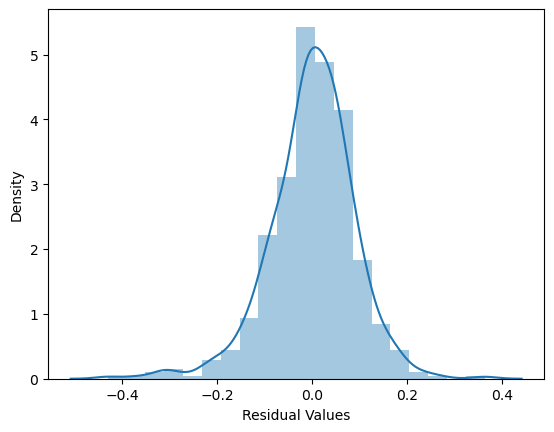

In [108]:
sns.distplot(lm_rfe_ols.resid,bins=20)
plt.xlabel('Residual Values')

Text(0, 0.5, 'Standardized Residuals')

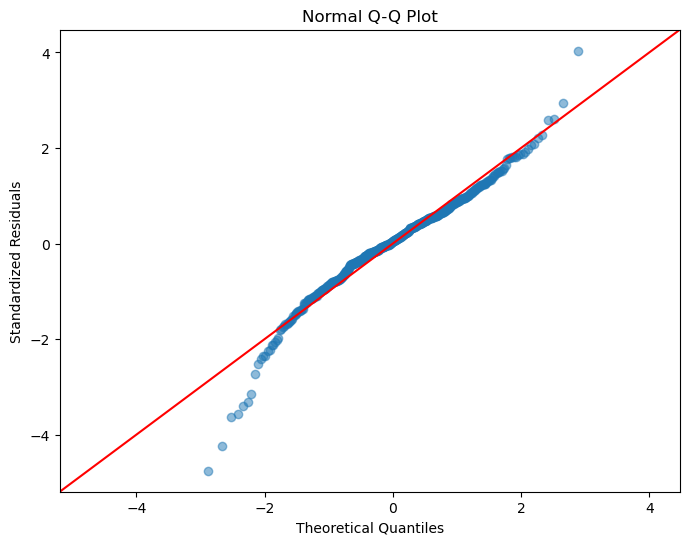

In [109]:
QQ = ProbPlot(lm_rfe_ols.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1)
fig.set_size_inches(8, 6)
fig.gca().set_title('Normal Q-Q Plot')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals')

#### Observation-2: It can be seen from the Q-Q plot that the sample standardised residuals are following the theoretical line except for the tail points, indicating that the distribution is normal.

In [110]:
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [111]:
y_test=df_test.pop('cnt')

In [112]:
X_test=df_test

In [113]:
col=X_train_rfe.columns

In [114]:
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'light snow',
       'mist', 'Jul', 'Sep', 'Sunday'],
      dtype='object')

In [115]:
X_test=X_test[col]

In [116]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'light snow',
       'mist', 'Jul', 'Sep', 'Sunday'],
      dtype='object')

In [117]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=lm_rfe_ols.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

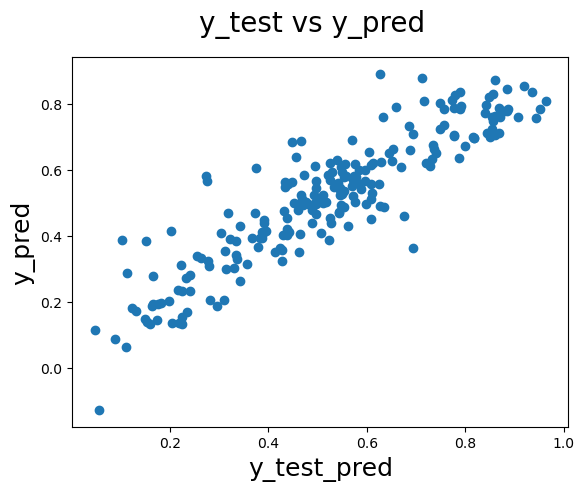

In [118]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_pred', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)      

#### It can be seen from the above figure that the model is good and it is able to predict the values of bike demand with a good amount of accuracy with the model.

In [119]:
print(r2_score(y_test,y_test_pred))

0.809677795028276


#### The R2 score for the test data as per model 2 is 0.810 in comparison to the R2 score of 0.838 for the train data set.

#### The equation of our best fitted line as per model 3 is:

$ cnt = 0.2340  \times  yr - -0.1062  \times  holiday + 0.4502 \times temp - 0.1396 \times windspeed - 0.1102 \times spring + 0.0494 \times winter  - 0.2916 \times light snow - 0.0831 \times mist - 0.0704 \times Jul  + 0.0564 \times Sep - 0.0479 \times Sunday + 0.2597 $

#### Model 3 can be chosen as the best model as it has lesser number of predictor variables in comparison to model 1 and model 3, though model 3 has the least number of predictor variables but it has a good R2 score of 0.810 for test data and 0.838 for train data both of which are near to the test and train R2 scores of both Model 2 and Model 3.

#### The chosen model is:

$ cnt = 0.2340  \times  yr - -0.1062  \times  holiday + 0.4502 \times temp - 0.1396 \times windspeed - 0.1102 \times spring + 0.0494 \times winter  - 0.2916 \times light snow - 0.0831 \times mist - 0.0704 \times Jul  + 0.0564 \times Sep - 0.0479 \times Sunday + 0.2597 $